# Slice and upload pottemp to study region

## Data taken from ORAS5: 
> https://www.ecmwf.int/en/research/climate-reanalysis/ocean-reanalysis

> https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-oras5?tab=overview

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import dask
import dask.array as dsa
from xgcm import Grid
import xgcm 
from xgcm.autogenerate import generate_grid_ds
from xhistogram.xarray import histogram
#import regionate as reg

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

pot_temp = xr.open_zarr(gcfs_w_token.get_mapper(f'pangeo-tmp/stb2145/ERA5/datasets/pot-temp75z.zarr'))

In [20]:
pot_temp

<xarray.Dataset>
Dimensions:            (deptht: 75, y: 1021, x: 1442, time_counter: 10, bnds: 2)
Coordinates:
  * deptht             (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat            (y, x) float32 dask.array<chunksize=(1021, 1442), meta=np.ndarray>
    nav_lon            (y, x) float32 dask.array<chunksize=(1021, 1442), meta=np.ndarray>
  * time_counter       (time_counter) datetime64[ns] 2023-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x, bnds
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
    votemper           (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1021, 1442), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 5.1.1 (Homepage = http://nco.sf.ne...
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...
    source:       ORAS5 - backward extension (ECMWF)
    title:        Monthly mean temperature

>longitude: [-100, -72] 
>> latitude: [22, 31]

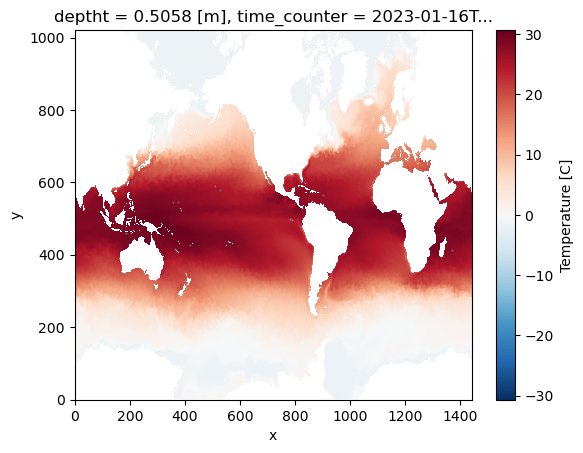

In [7]:
pot_temp.votemper.isel(deptht=0, time_counter=0).plot()

In [9]:
#upper lat: 31
pot_temp.nav_lat[-390].values

array([31.084433, 31.084425, 31.084433, ..., 31.084455, 31.084433,
       31.084425], dtype=float32)

In [13]:
#lower lat:22
pot_temp.nav_lat[-433].values

array([21.941473, 21.941473, 21.941473, ..., 21.941473, 21.941473,
       21.941473], dtype=float32)

In [18]:
pot_temp.nav_lat[-433:-389].values

array([[21.941473, 21.941473, 21.941473, ..., 21.941473, 21.941473,
        21.941473],
       [22.17237 , 22.17237 , 22.17237 , ..., 22.172373, 22.17237 ,
        22.17237 ],
       [22.40268 , 22.40268 , 22.40268 , ..., 22.40268 , 22.40268 ,
        22.40268 ],
       ...,
       [30.704077, 30.70407 , 30.704077, ..., 30.704096, 30.704077,
        30.70407 ],
       [30.89489 , 30.894882, 30.89489 , ..., 30.89491 , 30.89489 ,
        30.894882],
       [31.084433, 31.084425, 31.084433, ..., 31.084455, 31.084433,
        31.084425]], dtype=float32)

In [48]:
pot_temp.nav_lon[-390, 749].values

array(-100.00401, dtype=float32)

In [49]:
pot_temp.nav_lon[-389, 749].values

array(-100.004326, dtype=float32)

In [50]:
pot_temp.nav_lon[-443, 749].values

array(-100., dtype=float32)

In [65]:
pot_temp.nav_lon[-390, 861].values

array(-72.014946, dtype=float32)

In [66]:
pot_temp.nav_lon[-389, 861].values

array(-72.01613, dtype=float32)

In [67]:
pot_temp.nav_lon[-443, 861].values

array(-72., dtype=float32)

In [72]:
pot_temp.nav_lon[-433:-389, 749:862].values

array([[-100.      ,  -99.75    ,  -99.5     , ...,  -72.50001 ,
         -72.25001 ,  -72.00001 ],
       [-100.      ,  -99.75    ,  -99.5     , ...,  -72.50001 ,
         -72.25001 ,  -72.00001 ],
       [-100.00001 ,  -99.75001 ,  -99.50001 , ...,  -72.500015,
         -72.250015,  -72.000015],
       ...,
       [-100.00343 ,  -99.75355 ,  -99.50367 , ...,  -72.51271 ,
         -72.26274 ,  -72.01277 ],
       [-100.003716,  -99.75384 ,  -99.50397 , ...,  -72.513756,
         -72.263794,  -72.013824],
       [-100.00401 ,  -99.75415 ,  -99.50429 , ...,  -72.51487 ,
         -72.26491 ,  -72.014946]], dtype=float32)

In [76]:
pot_temp

<xarray.Dataset>
Dimensions:            (deptht: 75, y: 1021, x: 1442, time_counter: 10, bnds: 2)
Coordinates:
  * deptht             (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat            (y, x) float32 dask.array<chunksize=(1021, 1442), meta=np.ndarray>
    nav_lon            (y, x) float32 dask.array<chunksize=(1021, 1442), meta=np.ndarray>
  * time_counter       (time_counter) datetime64[ns] 2023-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x, bnds
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
    votemper           (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 1021, 1442), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 5.1.1 (Homepage = http://nco.sf.ne...
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...
    source:       ORAS5 - backward extension (ECMWF)
    title:        Monthly mean temperature

In [77]:
pt_gulf = pot_temp.votemper[:, :, -433:-389, 749:862]

In [78]:
pt_gulf

<xarray.DataArray 'votemper' (time_counter: 10, deptht: 75, y: 44, x: 113)>
dask.array<getitem, shape=(10, 75, 44, 113), dtype=float32, chunksize=(1, 75, 44, 113), chunktype=numpy.ndarray>
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat       (y, x) float32 dask.array<chunksize=(44, 113), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(44, 113), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2023-01-16T12:00:00 ... 2023-...
Dimensions without coordinates: y, x
Attributes:
    interval_operation:  1200.0
    interval_write:      2678400.0
    long_name:           Temperature
    offline_operation:   ave(x)
    online_operation:    ave(x)
    standard_name:       Temperature
    units:               C

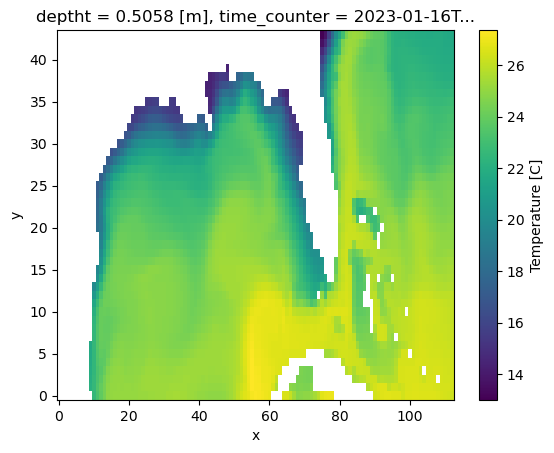

In [80]:
#aligns well with fig in nb5 mask map!
pt_gulf[0,0].plot()

In [ ]:
pt_gulf.to

In [33]:
#uploading gulf pot-temp
import json
import gcsfs

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)


gcsmap_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/pt_gulf.zarr')
pt_gulf.to_zarr(gcsmap_ds, mode='w')